In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/小穗步網站/用 ChatGPT 做資料分析')
os.listdir() #確認目錄內容


Mounted at /content/drive


['飲食花費記帳資料.csv',
 '飲食花費記帳資料.gsheet',
 'TaipeiSansTCBeta-Regular.ttf',
 '呈現花費的流向圖_Sankey Diagram_play.ipynb',
 '呈現花費的流向圖_Sankey Diagram_open.ipynb']

**第二步**
透過 pandas 套件，把你的記帳檔案的的資料讀進來。

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/小穗步網站/用 ChatGPT 做資料分析/飲食花費記帳資料.csv')
print(df.head())

   帳戶   幣種 記錄類型 主類別 子類別   金額  手續費  折扣  名稱   商家        日期     時間
0  現金  TWD   支出  飲食  晚餐 -500    0   0 NaN  NaN  2020/1/1  00:23
1  現金  TWD   支出  飲食  午餐 -335    0   0 NaN  NaN  2020/1/1  12:30
2  現金  TWD   支出  飲食  早餐  -95    0   0 NaN  NaN  2020/1/1  18:15
3  現金  TWD   支出  飲食  點心  -81    0   0 NaN  NaN  2020/1/1  18:15
4  現金  TWD   支出  飲食  飲料  -30    0   2 NaN  迷客夏  2020/1/2  20:03


**第三步**
Colab 進行matplotlib繪圖時顯示繁體中文
下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑

In [3]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-06-18 06:13:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.162.113, 142.251.162.100, 142.251.162.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/veham6kph98j7rc4p2f94ehtm3a10i0p/1687068750000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=643f3ae4-63ff-49a3-ab92-91d9fddcc031 [following]
--2023-06-18 06:13:30--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/veham6kph98j7rc4p2f94ehtm3a10i0p/1687068750000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=643f3ae4-63ff-49a3-ab92-91d9fddcc031
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to d

<ipython-input-3-7e8b3696d89e>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


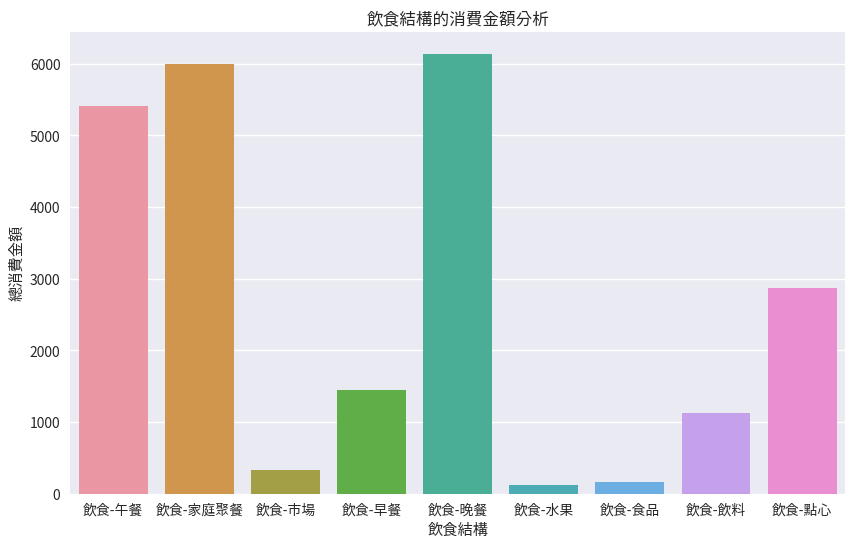

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
# 將主類別與子類別組合成一個新的欄位，用於表示飲食結構
df['飲食結構'] = df['主類別'] + '-' + df['子類別']
#因為支出為負值，所以先做轉換
df['金額']=abs(df['金額'])
df['折扣']=-df['折扣']

# 計算每種飲食結構的總消費金額
food_structure = df[(df['記錄類型'] == '支出')&(df['主類別'] == '飲食')].groupby('飲食結構')['金額'].sum()

# 使用 seaborn 繪製條形圖
plt.figure(figsize=(10, 6))  # 設定圖形的大小
sns.barplot(x=food_structure.index, y=food_structure.values)
#plt.xticks(rotation=90)  # 將 x 軸的標籤旋轉 90 度，以避免文字重疊
plt.title('飲食結構的消費金額分析')  # 設定圖形的標題
plt.ylabel('總消費金額')  # 設定 y 軸的標籤
plt.show()  # 顯示圖形


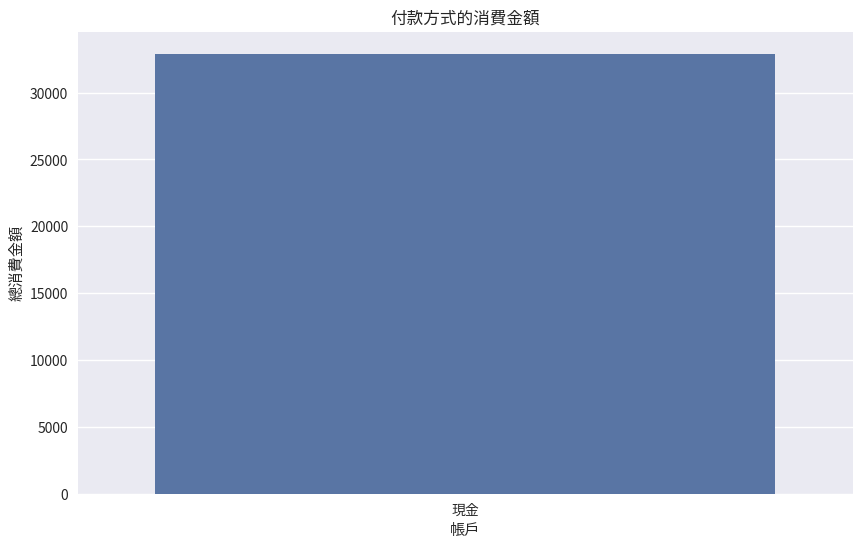

In [7]:
# 計算每種飲食結構的總消費金額
pay_structure = df[(df['記錄類型'] == '支出')].groupby('帳戶')['金額'].sum()

# 使用 seaborn 繪製條形圖
plt.figure(figsize=(10, 6))  # 設定圖形的大小
sns.barplot(x=pay_structure.index, y=pay_structure.values)
#plt.xticks(rotation=90)  # 將 x 軸的標籤旋轉 90 度，以避免文字重疊
plt.title('付款方式的消費金額')  # 設定圖形的標題
plt.ylabel('總消費金額')  # 設定 y 軸的標籤
plt.show()  # 顯示圖形

In [8]:
print(df.columns)

Index(['帳戶', '幣種', '記錄類型', '主類別', '子類別', '金額', '手續費', '折扣', '名稱', '商家', '日期',
       '時間', '飲食結構'],
      dtype='object')


In [9]:
import plotly.graph_objects as go
# 假設你已經有了一個包含 '紀錄類型', '主類別', '子類別', '金額' 這四個欄位的 DataFrame df
# 首先，我們需要為每個類別建立一個唯一的ID
categories = pd.concat([df['記錄類型'], df['主類別'], df['子類別']]).unique()
category_ids = {category: i for i, category in enumerate(categories)}
print(category_ids)

# 然後，我們需要創建三個列表來存儲源節點（source nodes）、目標節點（target nodes）和流量的權重（weights）
source_nodes = []
target_nodes = []
weights = []

for _, row in df.iterrows():
    source_nodes.append(category_ids[row['記錄類型']])
    source_nodes.append(category_ids[row['主類別']])
    target_nodes.append(category_ids[row['主類別']])
    target_nodes.append(category_ids[row['子類別']])
    weights.append(row['金額'])
    weights.append(row['金額'])

print(source_nodes)
print(target_nodes)
print(weights)
# 最後，我們使用 plotly 來創建 Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = categories,
        color = "blue"
    ),
    link = dict(
        source = source_nodes,
        target = target_nodes,
        value = weights
    )
)])

fig.show()



{'支出': 0, '飲食': 1, '醫療': 2, '購物': 3, '旅行': 4, '晚餐': 5, '午餐': 6, '早餐': 7, '點心': 8, '飲料': 9, '食品': 10, '市場': 11, '門診': 12, '水果': 13, '玩具': 14, '門票': 15, '家庭聚餐': 16, '鞋子': 17, '配件': 18}
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 5, 1, 6, 1, 7, 1, 8, 1, 9, 1, 8, 1, 9, 1, 6, 1, 7, 1, 9, 1, 5, 1, 7, 1, 10, 1, 9, 1, 8

In [10]:
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.cm as cm
#food_data=df[(df['記錄類型'] == '支出')&(df['主類別'] == '飲食')]
# 假設你已經有了一個包含 '紀錄類型', '主類別', '子類別', '金額' 這四個欄位的 DataFrame df

# 首先，我們需要為每個類別建立一個唯一的ID
categories = pd.concat([df['記錄類型'], df['主類別'], df['子類別']]).unique()
category_ids = {category: i for i, category in enumerate(categories)}
# 然後，我們需要創建三個列表來存儲源節點（source nodes）、目標節點（target nodes）和流量的權重（weights）
source_nodes = []
target_nodes = []
weights = []

for _, row in df.iterrows():
    source_nodes.append(category_ids[row['記錄類型']])
    source_nodes.append(category_ids[row['主類別']])
    target_nodes.append(category_ids[row['主類別']])
    target_nodes.append(category_ids[row['子類別']])
    weights.append(row['金額'])
    weights.append(row['金額'])

#colors = ["blue", "green", "red","pink","orange"]
#category_colors = {category: colors[i % len(colors)] for i, category in enumerate(categories)}
#node_colors = [category_colors[category] for category in categories]

# 建立一個字典，將每一個 "主類別" 映射到一個特定的顏色
# 這裡我們使用 matplotlib 的 'tab10' colormap，它包含 10 種顏色
color_map = cm.get_cmap('tab10')
category_colors = {category: color_map(i) for i, category in enumerate(df['主類別'].unique())}

# 為每一個 "主類別" 創建一個漸層顏色映射
cmaps = {}
for category in df['主類別'].unique():
    cmaps[category] = mcolors.LinearSegmentedColormap.from_list(category, ["white", category_colors[category]])

# 在創建 Sankey 圖的節點時，根據每一個 "子類別" 的 "主類別" 分配顏色
node_colors = []
for category in categories:
    if category in df['主類別'].unique():
        node_colors.append(mcolors.to_hex(category_colors[category]))
    else:
        parent_categories = df.loc[df['子類別'] == category, '主類別'].values
        if len(parent_categories) > 0:
            parent_category = parent_categories[0]
            cmap = cmaps[parent_category]
            node_colors.append(mcolors.to_hex(cmap(df.loc[df['子類別'] == category].shape[0] / df.loc[df['主類別'] == parent_category].shape[0])))
        else:
            node_colors.append('gray')  # 設定一個預設顏色，以防找不到對應的主類別



# 最後，我們使用 plotly 來創建 Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = categories,
        color = node_colors  # 為每一個節點指派對應的顏色
    ),
    link = dict(
        source = source_nodes,
        target = target_nodes,
        value = weights
    )
)])

fig.show()


<ipython-input-10-3c5da6a2f7b4>:29: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



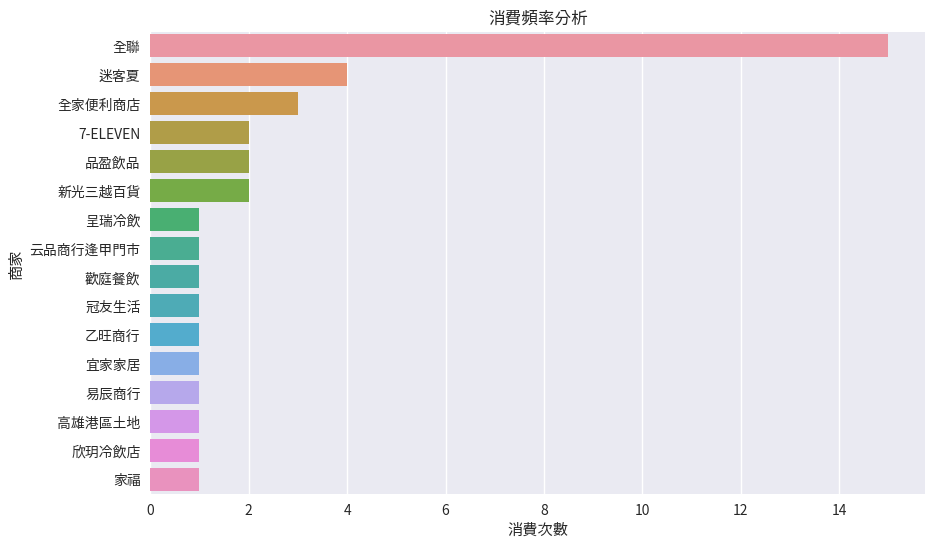

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設你已經有一個包含 '商家' 這個欄位的 DataFrame df

# 使用 groupby 計算每個商家的消費次數
shop_counts = df['商家'].value_counts()

# 為了方便繪圖，我們將資料轉換成 DataFrame 的形式
shop_counts_df = pd.DataFrame({'商家': shop_counts.index, '消費次數': shop_counts.values})

# 使用 seaborn 繪製 barplot
plt.figure(figsize=(10, 6))  # 調整圖片大小
sns.barplot(x='消費次數', y='商家', data=shop_counts_df, orient='h')

plt.title('消費頻率分析')  # 圖片標題
plt.xlabel('消費次數')  # x軸標籤
plt.ylabel('商家')  # y軸標籤
plt.show()


參考資料來源:
1.[Day 11 : Google Colab 實用奧步篇](https://ithelp.ithome.com.tw/articles/10234373?sc=hot)